# Store Performance Classification Project

In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
pd.set_option('display.max_columns',20)
pd.set_option('display.max_rows',40)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, recall_score,precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.inspection import permutation_importance

In [2]:
#importing Store dataset
Store = pd.read_csv("storedata.csv")

In [3]:
Store.info() #Checking for the datasets information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Town                136 non-null    object
 1   Country             136 non-null    object
 2   Store ID            136 non-null    int64 
 3   Manager name        136 non-null    object
 4   Staff               136 non-null    int64 
 5   Floor Space         136 non-null    int64 
 6   Window              136 non-null    int64 
 7   Car park            136 non-null    object
 8   Demographic score   136 non-null    int64 
 9   Location            136 non-null    object
 10  40min population    136 non-null    int64 
 11  30 min population   136 non-null    int64 
 12  20 min population   136 non-null    int64 
 13  10 min population   136 non-null    int64 
 14  Store age           136 non-null    int64 
 15  Clearance space     136 non-null    int64 
 16  Competition number  136 no

# Data Cleaning

In [4]:
Store.isnull().sum() #Checking for missing values

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [5]:
Store.isna().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [6]:
Store.shape #Checking for the numbers of rows and columns in the dataset

(136, 19)

In [7]:
Store['Performance'].unique() #Checking for the uniqueness of the target variable, Performance

array(['Good', 'Bad'], dtype=object)

# Descriptive Statistics

In [8]:
Store.describe(include='all').T #Descriptive statistics of the variables

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Town,136,136,Swinton (Greater Manchester),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,136,2,UK,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store ID,136.0,NaN,NaN,NaN,52172.580882,28725.990237,1437.0,24707.25,56011.5,76870.5,99854.0
Manager name,136,118,Sarah,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Staff,136.0,NaN,NaN,NaN,13.352941,56.592439,-2.0,6.0,7.0,8.0,600.0
Floor Space,136.0,NaN,NaN,NaN,15024.095588,2761.801921,10072.0,12793.0,14596.5,17543.75,19869.0
Window,136.0,NaN,NaN,NaN,112.044118,6.884085,100.0,106.75,111.0,118.0,124.0
Car park,136,4,Yes,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Demographic score,136.0,NaN,NaN,NaN,14.463235,2.874944,10.0,12.0,14.5,17.0,19.0
Location,136,4,Shopping Centre,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Store.duplicated().any() #Checking for duplicates in the dataset

False

In [10]:
Store.corr() #checking the correlation of each of the independent variables to the target value

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
Store ID,1.000000,0.069173,0.014658,0.014756,0.174201,0.070286,0.015162,0.058195,0.072882,0.008830,0.072401,0.156863,-0.077005
Staff,0.069173,1.000000,0.076039,0.077630,-0.057831,-0.098366,-0.024631,-0.056310,-0.006601,-0.172655,0.110591,0.034571,0.123579
Floor Space,0.014658,0.076039,1.000000,0.999208,0.038187,0.051918,-0.032199,-0.046161,-0.096698,-0.049285,0.627324,0.073559,0.091447
Window,0.014756,0.077630,0.999208,1.000000,0.038633,0.053228,-0.028688,-0.042441,-0.091651,-0.048992,0.628509,0.074034,0.104551
Demographic score,0.174201,-0.057831,0.038187,0.038633,1.000000,0.036694,-0.007616,0.053498,0.099587,-0.014967,0.041849,-0.100716,-0.072325
40min population,0.070286,-0.098366,0.051918,0.053228,0.036694,1.000000,0.624732,0.516682,0.432857,-0.191329,-0.018234,-0.004326,0.040554
30 min population,0.015162,-0.024631,-0.032199,-0.028688,-0.007616,0.624732,1.000000,0.766158,0.667031,-0.098829,-0.093048,-0.054191,0.046811
20 min population,0.058195,-0.056310,-0.046161,-0.042441,0.053498,0.516682,0.766158,1.000000,0.807882,-0.046910,-0.085887,-0.081947,0.008492
10 min population,0.072882,-0.006601,-0.096698,-0.091651,0.099587,0.432857,0.667031,0.807882,1.000000,-0.103815,-0.053129,-0.039108,0.068781
Store age,0.008830,-0.172655,-0.049285,-0.048992,-0.014967,-0.191329,-0.098829,-0.046910,-0.103815,1.000000,-0.037935,-0.063024,-0.109725


# DATA VISUALIZATION such as , Barplot,countplot, Boxplot, Catplot, Heatmap, Histogram, Violinplot,Scatterplot,Density,Distribution plot, etc.

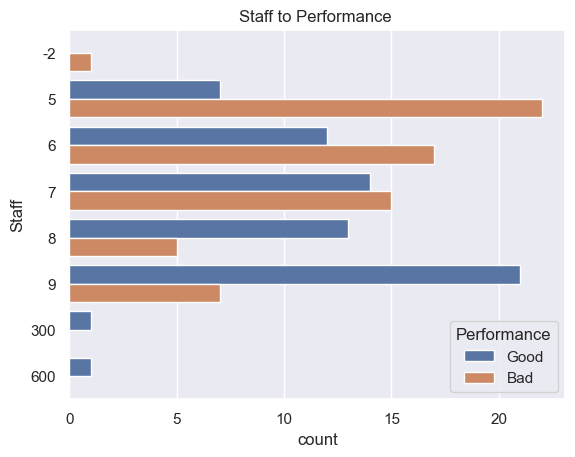

In [11]:
sns.set(style= "darkgrid")
sns.countplot(y= "Staff", hue="Performance", data=Store )
plt.title("Staff to Performance ")
plt.show()

#This chart illustrates the performance of each staff
##.set() is for adding labels and axis to the plot
##. title() is for adding title to the plot

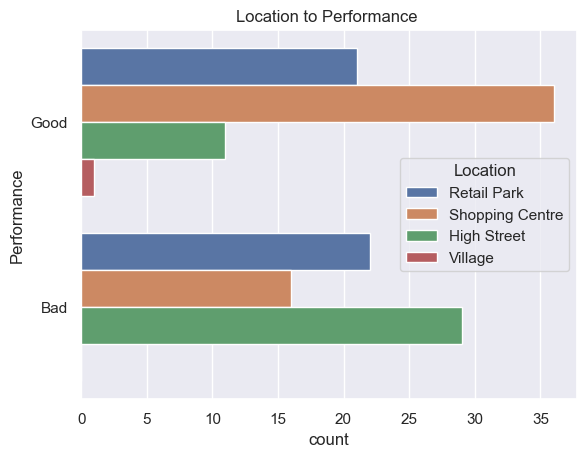

In [12]:
sns.set(style= "darkgrid")
sns.countplot(y= "Performance", hue="Location", data=Store )
plt.title("Location to Performance ")
plt.show()

#This chart illustrates the performance of each Location
##.set() is for adding labels and axis to the plot
##. title() is for adding title to the plot

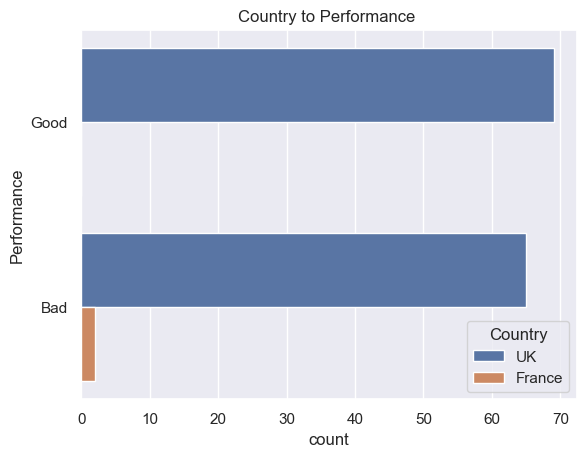

In [13]:
sns.set(style= "darkgrid")
sns.countplot(y= "Performance", hue="Country", data=Store )
plt.title("Country to Performance ")
plt.show()

#This chart illustrates the performance of each Country
##.set() is for adding labels and axis to the plot
##. title() is for adding title to the plot

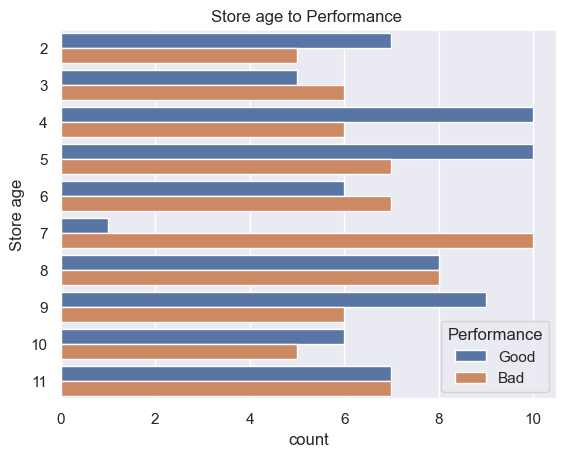

In [14]:
sns.set(style= "darkgrid")
sns.countplot(y= "Store age", hue="Performance", data=Store )
plt.title("Store age to Performance ")
plt.show()

#This chart illustrates the performance of each store age
##.set() is for adding labels and axis to the plot
##. title() is for adding title to the plot

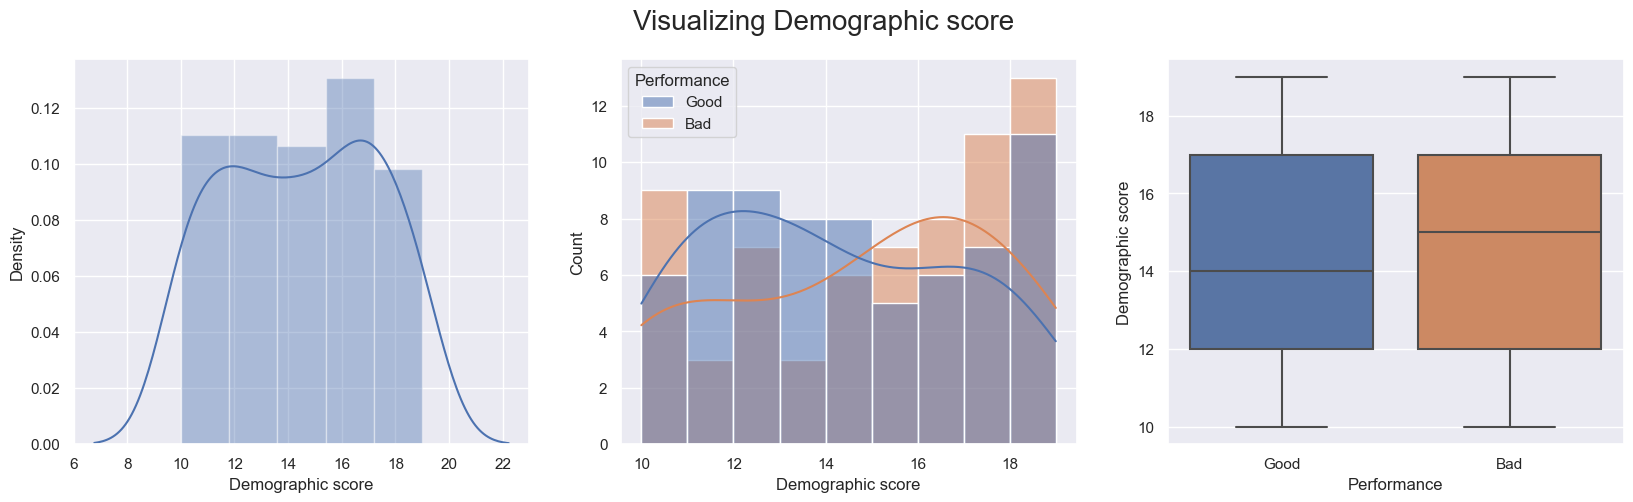

In [15]:
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(Store['Demographic score'],ax=ax[0])
sns.histplot(data =Store,x='Demographic score',ax=ax[1],hue='Performance',kde=True)
sns.boxplot(x=Store['Performance'],y=Store['Demographic score'],ax=ax[2])
plt.suptitle("Visualizing Demographic score",size=20)
plt.show()

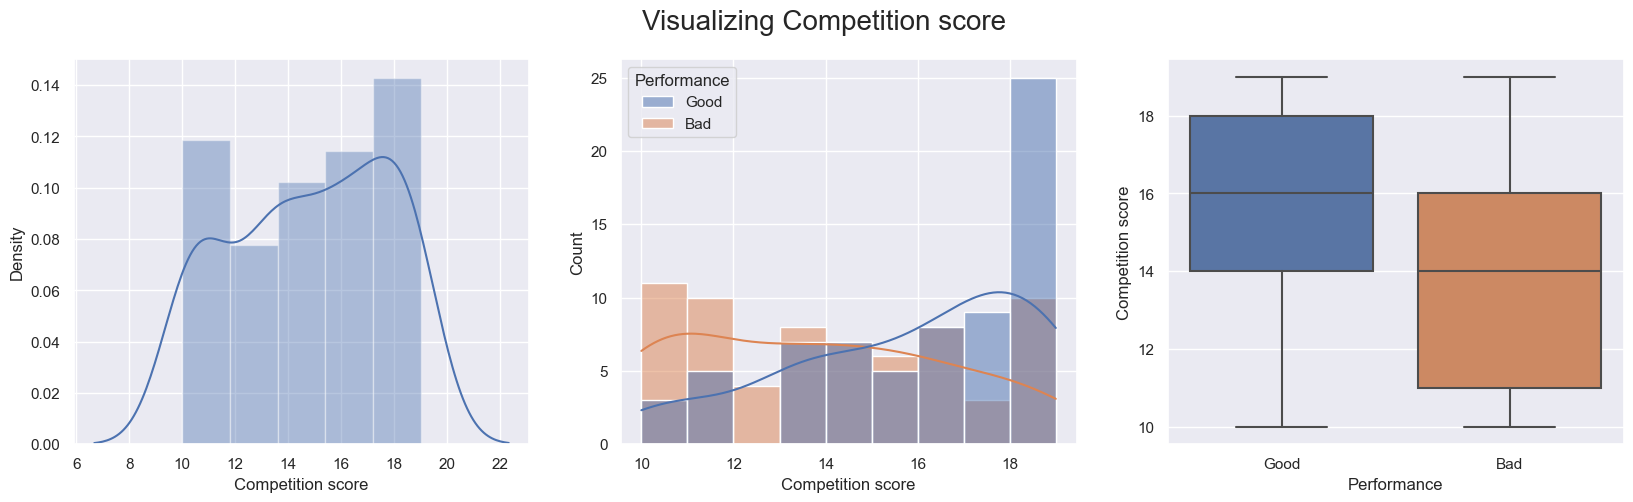

In [16]:
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(Store['Competition score'],ax=ax[0])
sns.histplot(data =Store,x='Competition score',ax=ax[1],hue='Performance',kde=True)
sns.boxplot(x=Store['Performance'],y=Store['Competition score'],ax=ax[2])
plt.suptitle("Visualizing Competition score",size=20)
plt.show()

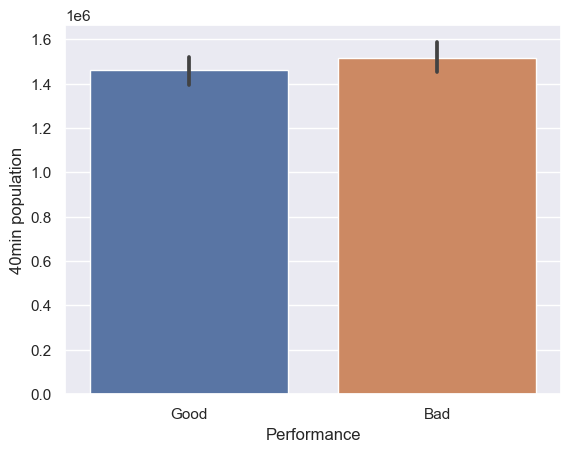

<Figure size 4000x1500 with 0 Axes>

In [17]:
sns.barplot(y= Store["40min population"], x= Store["Performance"] )
plt. figure(figsize=(40,15))
plt.show()


In [18]:
Store['Town'].unique()

array(['Swinton (Greater Manchester)', 'Stamford', 'Skipton', 'Stratton',
       'Shepperton', 'Southwell', 'Swinton (South Yorkshire)',
       'Sowerby Bridge', 'Sheffield', 'Stanley', 'Shepshed', 'Staines',
       'Sutton', 'Stafford', 'Sawbridgeworth', 'Stocksbridge', 'Salcombe',
       'Southminster', 'Slough', 'Sedgley', 'St Mawes', 'Sudbury',
       'Steyning', 'Southampton', 'Snaith', 'Sampford Courtenay',
       'Skelmersdale', 'Scunthorpe', 'Sunderland', 'Streatham',
       'Saxmundham', 'Sandiacre', 'Stretford', 'St Austell', 'Stalbridge',
       'Southwick', 'Shefford', 'Stanford-le-Hope', 'Swindon',
       'Stainforth', 'St Helens', 'Stourbridge', 'Swadlincote', 'Sale',
       'Seaham', 'Southwold', 'Shanklin', 'South Shields', 'Southport',
       'Stalham', 'Shaw & Crompton', 'South Elmsall', 'St Blazey',
       'Sherborne', 'Smethwick', 'Stow-on-the-Wold', 'Sandwich',
       'Shaftesbury', 'Spalding', 'Stockton-on-Tees', 'Stroud',
       'Scarborough', 'South Molton', 'Sa

In [19]:
Store['Country'].unique()

array(['UK', 'France'], dtype=object)

In [20]:
Store['Manager name'].unique()

array(['Roger', 'Ella', 'Valentina', 'Antonia', 'Gabriel', 'Sarah',
       'James', 'Ashley', 'Guilherme', 'Grace', 'Franco', 'Olivia',
       'Emily', 'Matheus', 'Megane', 'Samuel', 'Emma', 'Agustina',
       'Justin', 'Sebasti�n', 'Isabella', 'Laurence', 'J�lia', 'Luc�a',
       'Nicol�s', 'Sof�a', 'Luiz', 'Abigail', 'Fernanda', 'Mart�n',
       'Nathan', 'Francisca', 'Vin�cius', 'Madison', 'Hannah', 'Antony',
       'Tom�s', 'Samantha', 'Ryan', 'Logan', 'Sydney', 'Jeremy',
       'Larissa', 'Ava', 'Jacob', 'Yasmin', 'Vicente', 'Ethan', 'Micaela',
       'Matthew', 'Jo�o', 'Taylor', 'Xavier', 'Beatriz', 'Olivier',
       'Christopher', 'Sophia', 'Dylan', 'Jessica', 'Ana', 'Connor',
       'Julie', 'Liam', 'Jo', 'Victoria', 'Daniel', 'Camila', 'Lucas',
       'Diego', 'Megan', 'Martina', 'Noemie', 'Rosalie', 'Andrew',
       'Catalina', 'Alexis', 'Giovanna', 'Jos�', 'Felix', 'Audrey',
       'Nicholas', 'Benjam�n', 'Crist�bal', 'Noah', 'Joshua', 'Maria',
       'Kate', 'Michael', 'Thi

In [21]:
Store['Car park'].unique()

array(['Yes', 'No', 'Y', 'N'], dtype=object)

In [22]:
Store['Location'].unique()

array(['Retail Park', 'Shopping Centre', 'High Street', 'Village'],
      dtype=object)

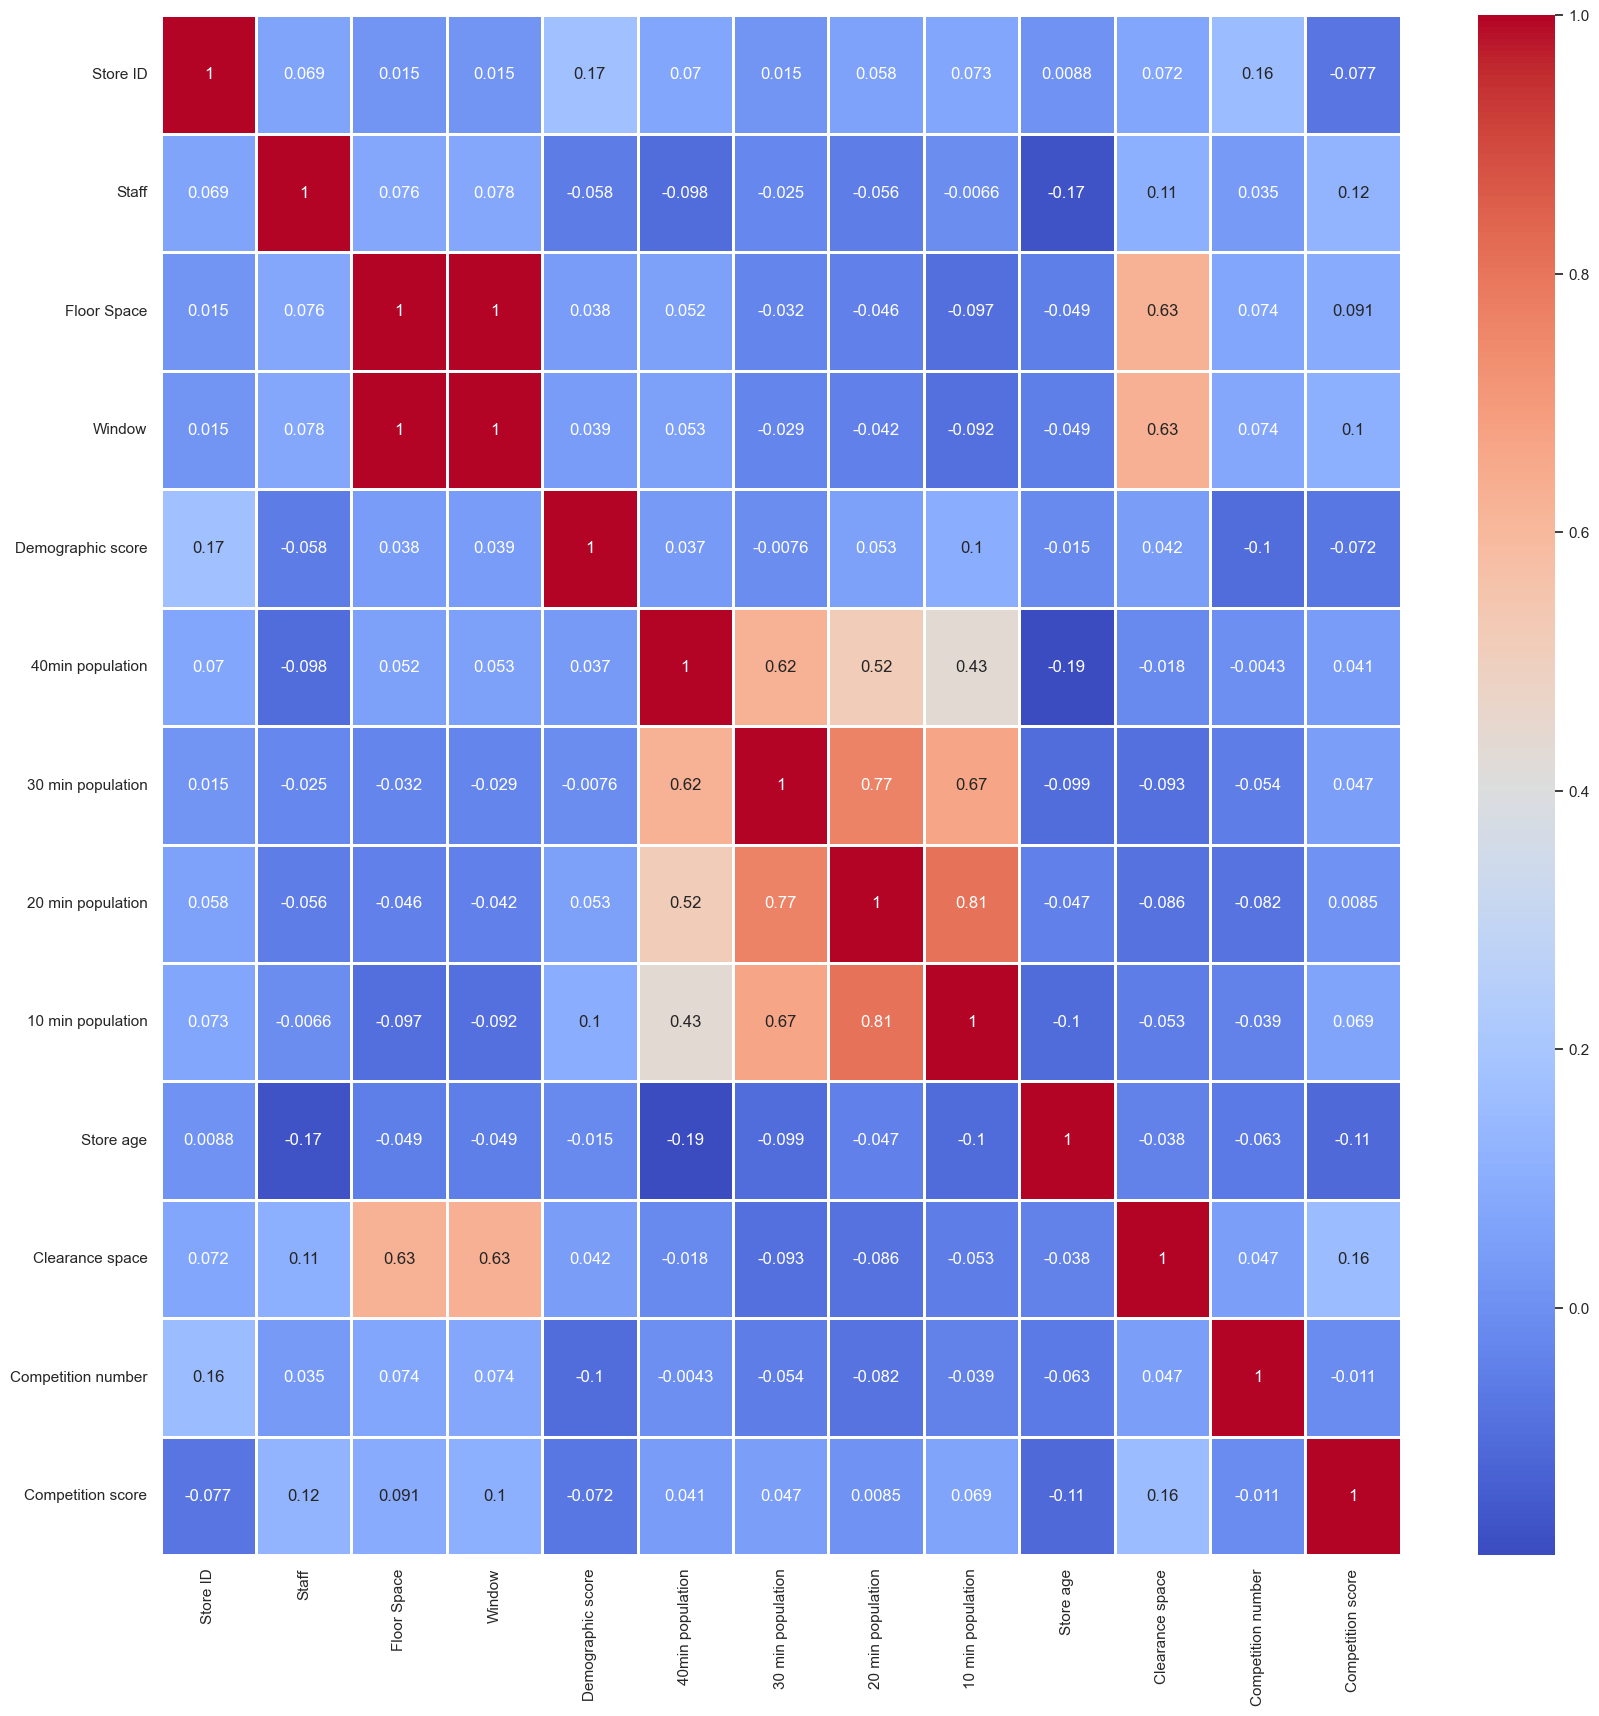

In [23]:
#Checking for multicollinearity in the dataset with the heat map

plt.figure(figsize = (20,20))
sns.heatmap(Store.corr(), linewidths=0.9,annot=True,cmap='coolwarm');

# Encoding of Categorical Variables

In [24]:
#Encoding the columns 'Town,Country, Manager name, Car park, Location and Performance' because they are object types. To create ml models, we need to feed the model
# with numbers i.e ints or floats or other dtypes in this dataset

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Store['Town']=encoder.fit_transform(Store['Town'])
Store['Country']=encoder.fit_transform(Store['Country'])
Store['Manager name']=encoder.fit_transform(Store['Manager name'])
Store['Car park']=encoder.fit_transform(Store['Car park'])
Store['Location']=encoder.fit_transform(Store['Location'])
Store['Performance']=encoder.fit_transform(Store['Performance'])
Store.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,133,1,1437,94,9,18526,121,3,10,1,1288374,1138224,1006986,1002340,3,238,16,16,1
1,96,1,1544,28,8,18569,121,3,11,2,1086225,1015321,1012182,1008436,4,384,15,19,1
2,52,1,2039,110,-2,12288,105,1,12,1,1595638,1281661,1104490,1011395,11,219,13,18,0
3,116,1,2055,10,7,17092,117,1,14,0,1179395,1022959,1009496,1002169,5,261,15,12,0
4,32,1,2141,36,7,11307,103,1,18,1,1398558,1085170,1003137,1002513,7,200,19,13,0


# Splitting into test data

In [25]:
X = Store.drop('Performance', axis =1 )
y = Store['Performance']

In [26]:
print(f'The shape of the original dataset is {Store.shape}')
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of the original dataset is (136, 19)
The shape of X is (136, 18)
The shape of y is (136,)


In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)
print(f'X_train shape : {X_train.shape}\nX_Test shape: {X_test.shape} \ny_train shape : {y_train.shape}\ny_test shape: {y_test.shape}')

X_train shape : (102, 18)
X_Test shape: (34, 18) 
y_train shape : (102,)
y_test shape: (34,)


# Scaling the dataset using StandardScaler

In [28]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
print(X_train.std())

1.0


# Modelling 
Model Development
Metrics:

The underlisted metrics below will be used to ascertain the best performing model
Accuracy
Precision
Recall
F1 score


In [30]:
Store_model_results = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [31]:
#Testing various classifiers to see which gives the best accuracy score

Store_models = [("Logistic Regression", LogisticRegression(random_state=101)), 
              ("Random Forest", RandomForestClassifier(random_state=101,n_estimators = 50)),
              ("Support Vector Machines", SVC(random_state=101,gamma=1, C = 100,probability = True)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier(n_neighbors=3)),
              ("Decision Tree", DecisionTreeClassifier(random_state=101  )),
              ("Bagging Classifier", BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators = 250), random_state=101)),
              ("Adaboost Classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state = 101,n_estimators =150 )),
              ("Gradient Boosting", GradientBoostingClassifier(random_state = 101,n_estimators = 250))]

In [32]:
from tqdm import tqdm

In [33]:
for clf_name, clf in tqdm(Store_models):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    ypred_prob = clf.predict_proba(X_test)[:, 1]
    rocAuc_score = roc_auc_score(y_test, ypred_prob)
    precision = precision_score(y_test, predictions)
#     recall_score = recall_score(y_test, predictions)
    new_row = {"Model": clf_name, "Accuracy Score": score, 'Roc_Auc_score':rocAuc_score,'precision score':precision}
    Store_model_results = Store_model_results.append(new_row, ignore_index=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.94s/it]


In [34]:
Store_model_results.sort_values(by="Accuracy Score", ascending=False)

,Model,Accuracy Score,Roc_Auc_score,precision score
1,Random Forest,0.764706,0.877163,0.846154
9,Gradient Boosting,0.735294,0.792388,0.750000
0,Logistic Regression,0.705882,0.851211,0.769231
7,Bagging Classifier,0.705882,0.896194,0.818182
8,Adaboost Classifier,0.705882,0.705882,0.769231
4,Bernoulli Naive Bayes,0.676471,0.775087,0.714286
6,Decision Tree,0.617647,0.617647,0.625000
5,KNN,0.558824,0.608997,0.571429
2,Support Vector Machines,0.500000,0.510381,0.500000
3,Gaussian Naive Bayes,0.500000,0.868512,0.500000


In [35]:
# It is desired that the curve is tilted towards the top left corner to have a good roc_auc_curve

def rocAuc_curve(Store_model, Store_model_name):
    '''
    A function that plots the area under the rate of characteristic curve
    '''
    ypred_prob = Store_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresh = roc_curve(y_test, ypred_prob)
    
    rocAuc_score = roc_auc_score(y_test, ypred_prob)
    
    plt.figure(figsize=(5,5))
    #plotting roc_auc curve
    plt.plot(fpr, tpr, linestyle="--", color="limegreen", label="ROC AUC Score: (%0.5f)" % rocAuc_score)
    #plotting a diagonal line
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    
    plt.title(f"{Store_model_name} ROC Curve", size=10)
    plt.xlabel("False Positive Rate", size = 10)
    plt.ylabel("True Positive Rate", size = 10)
    plt.legend(loc="lower right", prop={"size": 10})
    plt.show()

# Algorithm 1: Using Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
randomforestmodel.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [38]:
randomforest_prediction = randomforestmodel.predict(X_test)
randomforest_prediction

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

In [39]:
print(f'The classification report of the model is\n')
print(classification_report(y_test,predictions))

The classification report of the model is

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.75      0.71      0.73        17

    accuracy                           0.74        34
   macro avg       0.74      0.74      0.74        34
weighted avg       0.74      0.74      0.74        34



In [40]:
confusion_matrix(y_test,predictions)

array([[13,  4],
       [ 5, 12]], dtype=int64)

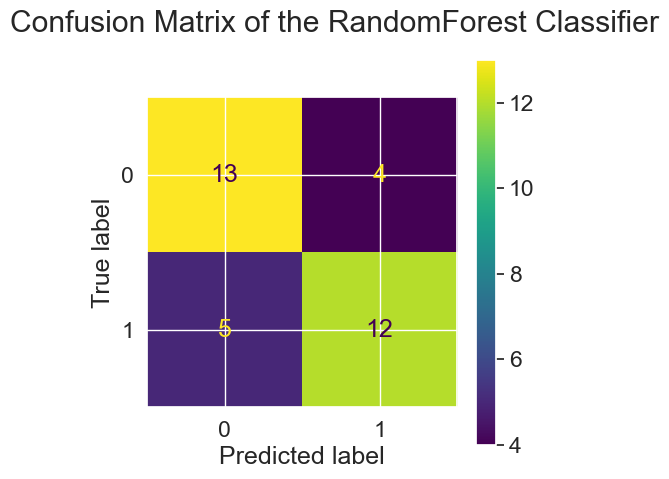

In [41]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=randomforestmodel.classes_)
disp.plot(ax = ax)
plt.suptitle("Confusion Matrix of the RandomForest Classifier")
plt.show()

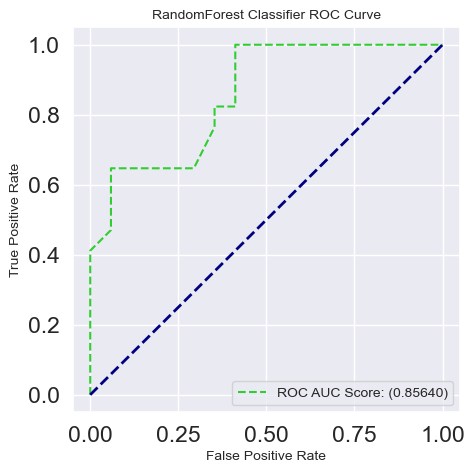

In [42]:
rocAuc_curve(randomforestmodel, 'RandomForest Classifier')

# Algorithm 2: Using Logistic Regression

In [43]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [44]:
print(f'The classification report of the model is\n')
print(classification_report(y_test,predictions))

The classification report of the model is

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        17
           1       0.77      0.59      0.67        17

    accuracy                           0.71        34
   macro avg       0.72      0.71      0.70        34
weighted avg       0.72      0.71      0.70        34



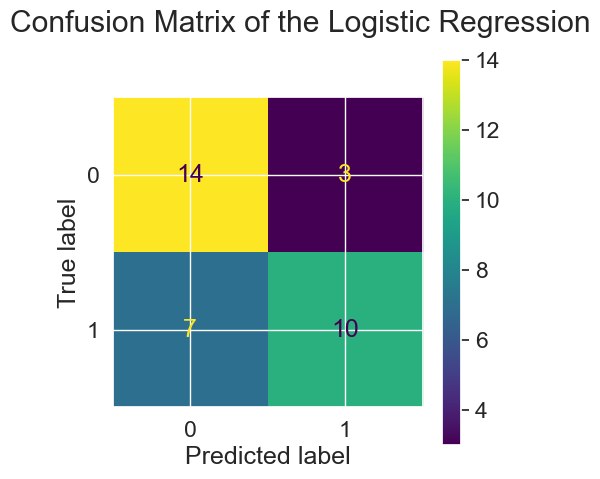

In [45]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(5,5))
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
disp.plot(ax = ax)
plt.suptitle("Confusion Matrix of the Logistic Regression")
plt.show()

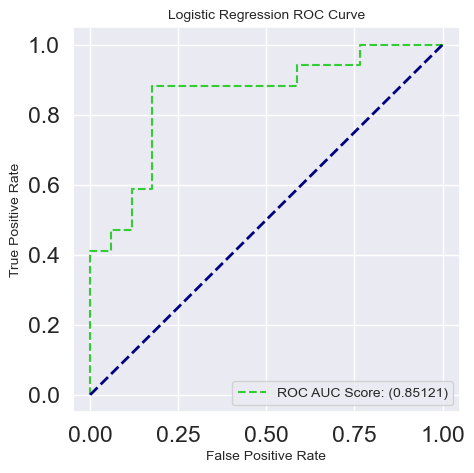

In [46]:
rocAuc_curve(lr, 'Logistic Regression')

In [47]:
# perform permutation importance
results = permutation_importance(randomforestmodel, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
col = X.columns.tolist()
for i,v in enumerate(importance):
    print(f'{col[i]} : {v}')

Town : 0.0
Country : 0.0
Store ID : 0.0
Manager name : 0.0
Staff : 0.03137254901960784
Floor Space : 0.0019607843137254832
Window : 0.0
Car park : 0.0
Demographic score : 0.0
Location : 0.025490196078431372
40min population : 0.0
30 min population : 0.0
20 min population : 0.0
10 min population : 0.0
Store age : 0.0
Clearance space : 0.0
Competition number : 0.013725490196078449
Competition score : 0.0


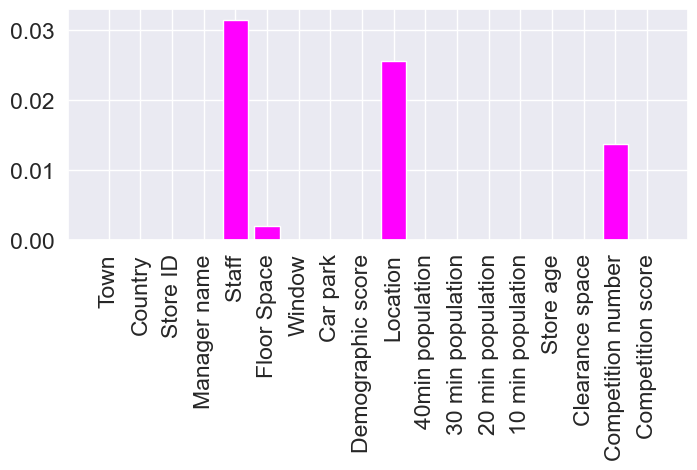

In [48]:
# plot feature importance
plt.figure(figsize = (8,3))
plt.bar(col, importance,color = 'magenta')
plt.xticks(rotation = 90)
plt.show()